# Data Preprocessing

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('dataset.csv')
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [3]:
print(df.shape)
print(df.columns)

(2240, 29)
Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


### Data Cleaning

In [4]:
df.isnull().mean()

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 0.010714
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

In [5]:
# Dop null values
print(df['Income'].mean())
df['Income'] = df['Income'].fillna(df['Income'].mean())
print(df['Income'].isnull().sum())
print(df['Income'].mean())

52247.25135379061
0
52247.25135379061


In [6]:
print(df['Marital_Status'].value_counts())
print(df['Education'].value_counts())

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


In [7]:
# Drop unnecessary categories
for i in range(df.shape[0]):
    if (df['Marital_Status'][i] == 'Absurd') or (df['Marital_Status'][i] == 'Alone') or (df['Marital_Status'][i] == 'YOLO'):
        df.drop(index=i, inplace=True)

In [8]:
print(df.shape)
print(df['Marital_Status'].value_counts())

(2233, 29)
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Name: Marital_Status, dtype: int64


### Data Transformation

In [9]:
import matplotlib.pyplot as plt
import numpy as np

(array([ 370., 1024.,  785.,   46.,    0.,    7.,    0.,    0.,    0.,
           0.]),
 array([     0.,  30000.,  60000.,  90000., 120000., 150000., 180000.,
        210000., 240000., 270000., 300000.]),
 <BarContainer object of 10 artists>)

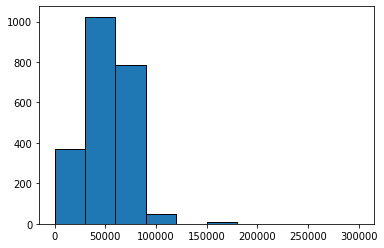

In [10]:
plt.hist(df['Income'],range=[0,300000],edgecolor='black')

In [11]:
df['Income'] = df['Income'].transform(np.log10)

(array([  2.,   6.,  22.,  74., 397., 941., 782.,   8.,   0.,   1.]),
 array([3.2380461 , 3.49663232, 3.75521854, 4.01380476, 4.27239098,
        4.5309772 , 4.78956343, 5.04814965, 5.30673587, 5.56532209,
        5.82390831]),
 <BarContainer object of 10 artists>)

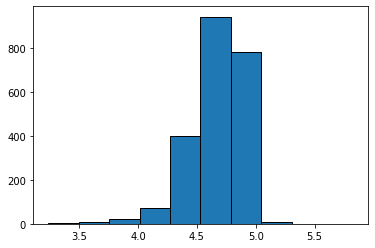

In [12]:
plt.hist(df['Income'],edgecolor='black')

In [13]:
df['dt_day_customer'] = df['Dt_Customer'].apply(lambda row: row.split('-')[0])
df['dt_month_customer'] = df['Dt_Customer'].apply(lambda row: row.split('-')[1])
df['dt_year_customer'] = df['Dt_Customer'].apply(lambda row: row.split('-')[2])

In [14]:
df.drop(columns=['Dt_Customer'], inplace=True)

In [15]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,dt_day_customer,dt_month_customer,dt_year_customer
0,5524,1957,Graduation,Single,4.764460,0,0,58,635,88,...,0,0,0,0,3,11,1,04,09,2012
1,2174,1954,Graduation,Single,4.665994,1,1,38,11,1,...,0,0,0,0,3,11,0,08,03,2014
2,4141,1965,Graduation,Together,4.854992,0,0,26,426,49,...,0,0,0,0,3,11,0,21,08,2013
3,6182,1984,Graduation,Together,4.425632,1,0,26,11,4,...,0,0,0,0,3,11,0,10,02,2014
4,5324,1981,PhD,Married,4.765616,1,0,94,173,43,...,0,0,0,0,3,11,0,19,01,2014


In [16]:
from datetime import date

In [17]:
df['age'] = date.today().year - df['Year_Birth']
df.drop(columns='Year_Birth',inplace=True)

In [18]:
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,dt_day_customer,dt_month_customer,dt_year_customer,age
0,5524,Graduation,Single,4.764460,0,0,58,635,88,546,...,0,0,0,3,11,1,04,09,2012,66
1,2174,Graduation,Single,4.665994,1,1,38,11,1,6,...,0,0,0,3,11,0,08,03,2014,69
2,4141,Graduation,Together,4.854992,0,0,26,426,49,127,...,0,0,0,3,11,0,21,08,2013,58
3,6182,Graduation,Together,4.425632,1,0,26,11,4,20,...,0,0,0,3,11,0,10,02,2014,39
4,5324,PhD,Married,4.765616,1,0,94,173,43,118,...,0,0,0,3,11,0,19,01,2014,42


### Data Discretization

In [19]:
df['class'] = pd.cut(df['Income'], 3, labels=['poor','middle','rich'])

In [20]:
df['class'].value_counts()

middle    2157
rich        39
poor        37
Name: class, dtype: int64

In [21]:
onehotencoding = pd.get_dummies(df[['Education','Marital_Status','class']], dtype=int)

In [22]:
onehotencoding.head()

,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,class_poor,class_middle,class_rich
0,0,0,1,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,1,0,0,1,0
3,0,0,1,0,0,0,0,0,1,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,0,1,0


In [23]:
df.drop(columns=['Education','Marital_Status','class'], inplace=True)

In [24]:
df = pd.concat([df,onehotencoding], axis=1)

In [25]:
df.head()

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,class_poor,class_middle,class_rich
0,5524,4.764460,0,0,58,635,88,546,172,88,...,0,0,0,0,1,0,0,0,1,0
1,2174,4.665994,1,1,38,11,1,6,2,1,...,0,0,0,0,1,0,0,0,1,0
2,4141,4.854992,0,0,26,426,49,127,111,21,...,0,0,0,0,0,1,0,0,1,0
3,6182,4.425632,1,0,26,11,4,20,10,3,...,0,0,0,0,0,1,0,0,1,0
4,5324,4.765616,1,0,94,173,43,118,46,27,...,0,1,0,1,0,0,0,0,1,0


### Data Reduction

In [26]:
df.describe()

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,class_poor,class_middle,class_rich
count,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,...,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.00000,2233.000000,2233.000000,2233.000000,2233.000000
mean,5595.398567,4.670708,0.444245,0.506046,49.172414,304.033587,26.300940,167.113300,37.445141,27.108374,...,0.164801,0.216301,0.103896,0.386923,0.214957,0.25974,0.034483,0.016570,0.965965,0.017465
std,3243.198115,0.218788,0.538528,0.544675,28.962114,336.953019,39.779532,225.870588,54.461569,41.321700,...,0.371084,0.411814,0.305194,0.487155,0.410885,0.43859,0.182506,0.127681,0.181360,0.131027
min,0.000000,3.238046,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,2831.000000,4.550510,0.000000,0.000000,24.000000,24.000000,1.000000,16.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
50%,5462.000000,4.714045,0.000000,0.000000,50.000000,173.000000,8.000000,67.000000,12.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
75%,8430.000000,4.834522,1.000000,1.000000,74.000000,505.000000,33.000000,232.000000,50.000000,33.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.00000,0.000000,0.000000,1.000000,0.000000
max,11191.000000,5.823908,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [27]:
# Drop Low Variance Columns
df['Income'].std()
num_df = df.drop(columns=['ID','dt_day_customer','dt_month_customer','dt_year_customer'])
for col in num_df.columns:
    if df[col].std() < 0.2:
        df.drop(columns=col, inplace=True)

In [28]:
print(df.shape)
print(df.columns)

(2233, 33)
Index(['ID', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'Response', 'dt_day_customer', 'dt_month_customer', 'dt_year_customer',
       'age', 'Education_2n Cycle', 'Education_Graduation', 'Education_Master',
       'Education_PhD', 'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together'],
      dtype='object')


In [29]:
# Drop Unneccesary Columns
df.drop(columns='ID', inplace=True)

In [30]:
df.corr().head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Response,age,Education_2n Cycle,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together
Income,1.000000,-0.452087,0.120054,0.006178,0.628389,0.441811,0.560901,0.455251,0.447512,0.349203,...,0.126451,0.226991,-0.071560,0.009851,0.032818,0.112358,0.008557,-0.010604,-0.032940,0.015387
Kidhome,-0.452087,1.000000,-0.036654,0.008674,-0.496564,-0.372176,-0.437136,-0.387375,-0.371070,-0.348971,...,-0.079694,-0.231090,0.019727,0.000372,0.007886,-0.041557,-0.019259,0.017371,0.019766,0.006331
Teenhome,0.120054,-0.036654,1.000000,0.017387,0.004641,-0.175268,-0.260538,-0.201949,-0.161907,-0.019243,...,-0.156225,0.352232,-0.056433,-0.020233,0.023885,0.087047,0.052819,0.008065,-0.095896,0.025307
Recency,0.006178,0.008674,0.017387,1.000000,0.015507,-0.005860,0.021870,-0.000565,0.021407,0.015896,...,-0.198307,0.018848,-0.008231,0.030965,-0.024114,-0.008650,0.003700,-0.024545,0.006033,0.019117
MntWines,0.628389,-0.496564,0.004641,0.015507,1.000000,0.389796,0.563280,0.401224,0.386592,0.388495,...,0.248638,0.157665,-0.099363,-0.058873,0.037908,0.158460,0.021035,-0.010738,-0.024391,0.004910


In [31]:
# Drop Highly Correlated Features
size = df.corr().shape[0]
for i in range(size):
    for j in range(size):
        if df.corr().iloc[i,j] == 1:
            continue
        if df.corr().iloc[i,j] >= 0.6:
            try:
                df.drop(j, axis=1)
            except:
                continue

In [32]:
print(df.shape)
print(df.columns)

(2233, 32)
Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'Response', 'dt_day_customer', 'dt_month_customer', 'dt_year_customer',
       'age', 'Education_2n Cycle', 'Education_Graduation', 'Education_Master',
       'Education_PhD', 'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together'],
      dtype='object')


In [34]:
# Save File
df.to_csv('res_dpre.csv')